In [59]:
%reload_ext lab_black
import pandas as pd
import numpy as np
from plotnine import *

In [60]:
# read data
od = pd.read_csv(
    "https://raw.githubusercontent.com/MIDS-at-Duke/estimating-impact-of-opioids-2020-purlple-team/coneel/10_code/od_deaths_state.csv?token=ARFW6V3OWJEBEXR6EAMOD4S7SS5MM"
)

population = pd.read_csv(
    "https://raw.githubusercontent.com/MIDS-at-Duke/estimating-impact-of-opioids-2020-purlple-team/ssloate/20_intermediate_files/countypopulations_clean.csv?token=ARFW6VZW7KFOHXGAJTTMYOK7SXO4E"
)

In [61]:
# rename od columns to match
od = od.rename(columns={"County Code": "FIPS"})

# drop _merge column in popualtion dataset
population = population.drop(columns="_merge")

In [63]:
# merge dataset. Use right merge, because it's okay if some years/counties don't have data in the od dataset. That just means there were less than 10 deaths
od_pop = pd.merge(population, od, on=["FIPS", "Year"], how="right", indicator=True)

assert od_pop[od_pop["_merge"] == "both"].all

In [64]:
# convert years to integers
od_pop["Year"] = od_pop["Year"].astype("int")

In [65]:
od_pop.sample(25)

,Unnamed: 0,State Name,County_x,Year,Population,FIPS,State Abbr,County_y,State,Deaths,_merge
7023,1213.0,Alabama,Talladega County,2013,81578.0,1121,AL,Talladega County,AL,11.0,both
718,36107.0,New York,Broome County,2007,200877.0,36007,NY,Broome County,NY,10.0,both
7314,54629.0,Texas,Victoria County,2009,86635.0,48469,TX,Victoria County,TX,10.0,both
3481,18143.0,Kansas,Johnson County,2003,485689.0,20091,KS,Johnson County,KS,28.0,both
5072,5667.0,Connecticut,New Haven County,2007,853598.0,9009,CT,New Haven County,CT,116.0,both
3252,44994.0,Pennsylvania,Indiana County,2014,87417.0,42063,PA,Indiana County,PA,11.0,both
6240,3866.0,California,San Diego County,2006,2947289.0,6073,CA,San Diego County,CA,332.0,both
7002,5788.0,Delaware,Sussex County,2008,191991.0,10005,DE,Sussex County,DE,19.0,both
2682,29909.0,Missouri,Greene County,2009,274013.0,29077,MO,Greene County,MO,53.0,both
6141,57490.0,Virginia,Russell County,2010,28878.0,51167,VA,Russell County,VA,12.0,both


In [66]:
# drop unneeded columns

od_pop = od_pop.drop(columns=["County_y", "State", "_merge"])

In [67]:
# rename columns for easier understanding
od_pop = od_pop.rename(
    columns={"State Name": "State", "County_x": "County"},
    errors="raise",
)

# reorder columns
od_pop = od_pop[
    ["FIPS", "State Abbr", "State", "County", "Year", "Deaths", "Population"]
]

# sort by state, county
od_pop = od_pop.sort_values(["State", "County", "Year"])
od_pop.sample(25)

,FIPS,State Abbr,State,County,Year,Deaths,Population
4515,37119,NC,North Carolina,Mecklenburg County,2003,38.0,753991.0
6984,47165,TN,Tennessee,Sumner County,2012,14.0,165967.0
4537,6045,CA,California,Mendocino County,2009,12.0,87722.0
7041,48439,TX,Texas,Tarrant County,2008,128.0,1745602.0
269,1003,AL,Alabama,Baldwin County,2005,14.0,162183.0
5596,4021,AZ,Arizona,Pinal County,2003,18.0,207920.0
457,45015,SC,South Carolina,Berkeley County,2010,22.0,179480.0
7252,49049,UT,Utah,Utah County,2014,81.0,560649.0
4215,42081,PA,Pennsylvania,Lycoming County,2012,11.0,117222.0
7864,54109,WV,West Virginia,Wyoming County,2006,14.0,24288.0


In [68]:
# Create per capita deaths column
od_pop["Deaths Per 100,000 People"] = (od_pop["Deaths"] / od_pop["Population"]) * 100000

In [69]:
# create TX, FL, and WA datasets

# Florida: pre and post 2010
FL_policy_year = 2010
FL = od_pop[od_pop["State Abbr"] == "FL"]
FL_pre = FL[FL["Year"] < FL_policy_year]
FL_post = FL[FL["Year"] >= FL_policy_year]

# Texas: pre and post 2007
TX_policy_year = 2007
TX = od_pop[od_pop["State Abbr"] == "TX"]
TX_pre = TX[TX["Year"] < TX_policy_year]
TX_post = TX[TX["Year"] >= TX_policy_year]

# WA: pre and post 2012
WA_policy_year = 2012
WA = od_pop[od_pop["State Abbr"] == "WA"]
WA_pre = WA[WA["Year"] < WA_policy_year]
WA_post = WA[WA["Year"] >= WA_policy_year]

# create a list of the states
titles = od_pop["State"].unique()
titles = titles.tolist()

In [70]:
# define policy years

# Florida: pre and post 2010
FL_policy_year = 2010

# Texas: pre and post 2007
TX_policy_year = 2007


# WA: pre and post 2012
WA_policy_year = 2012

# create a list of the states
states = od_pop["State Abbr"].unique()
states = states.tolist()

# define columns with pre variables
pre_columns_opioid_states = ["FL_pre", "TX_pre", "WA_pre"]
post_columns_opioid_states = ["FL_post", "TX_post", "WA_post"]
states_needed = ["FL", "TX", "WA"]
policy_years = [2010, 2007, 2012]

# create columns with all 0s
for i in range(0, 3):
    od_pop[pre_columns_opioid_states[i]] = 0
    od_pop[post_columns_opioid_states[i]] = 0

# fill in 1s in pre and post columns based on states and years
for i in range(0, 3):
    od_pop.loc[
        (
            (od_pop["State Abbr"] == states_needed[i])
            & (od_pop["Year"] < policy_years[i])
        ),
        pre_columns_opioid_states[i],
    ] = "1"
    od_pop.loc[
        (
            (od_pop["State Abbr"] == states_needed[i])
            & (od_pop["Year"] >= policy_years[i])
        ),
        post_columns_opioid_states[i],
    ] = "1"

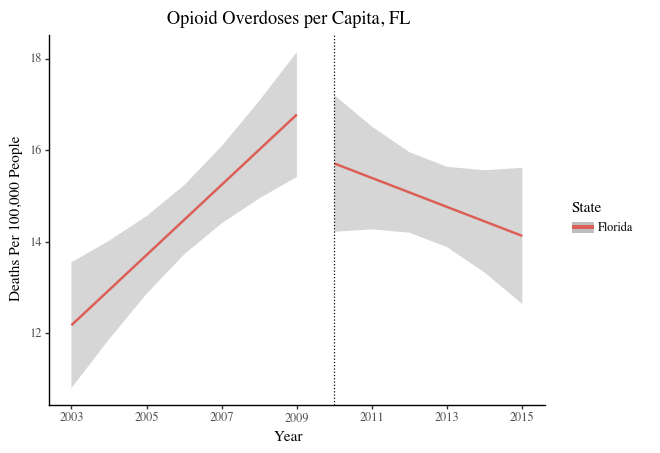

<ggplot: (8769696632533)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: FL_pre_post


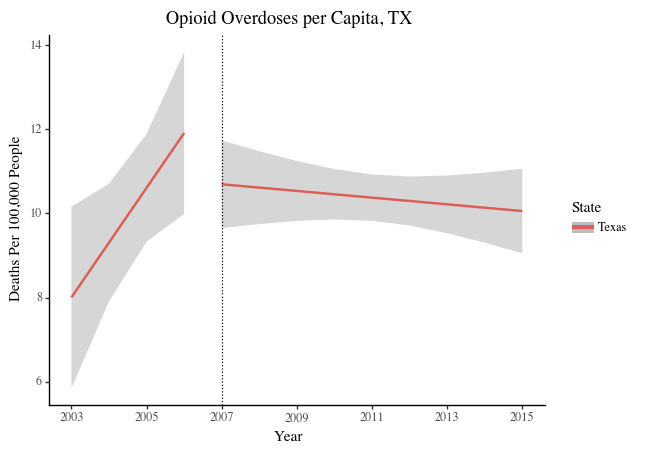

<ggplot: (8769697584781)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: TX_pre_post


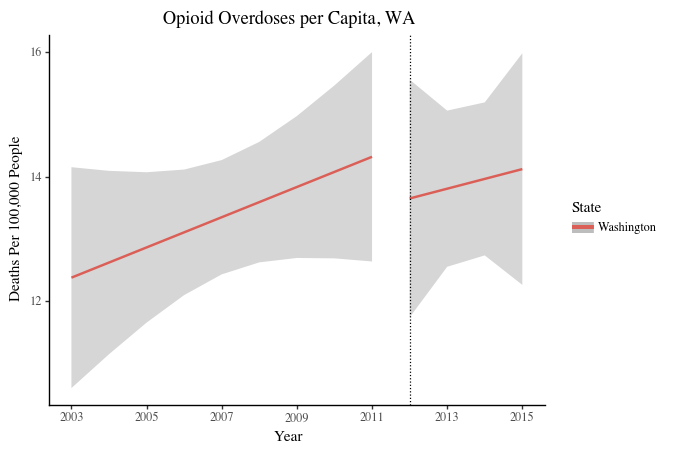

<ggplot: (8769696712425)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: WA_pre_post


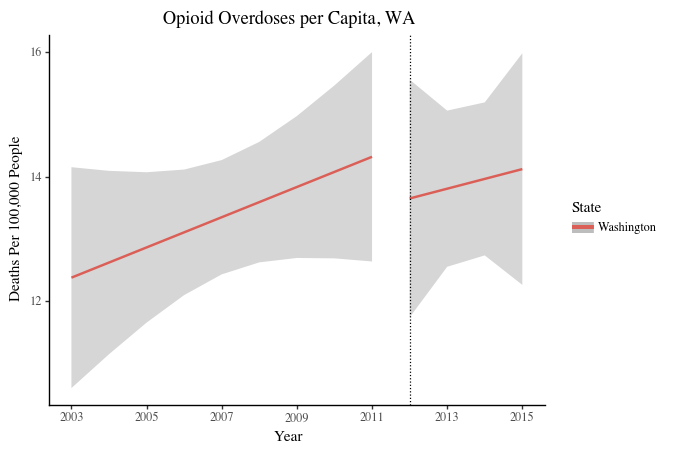

<ggplot: (8769696712425)>


In [52]:
# graph pre-post: loop over states

for i in range(len(policy_years)):
    p = (
        ggplot()
        + geom_smooth(
            od_pop[od_pop[pre_columns_opioid_states[i]] == "1"],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop[od_pop[post_columns_opioid_states[i]] == "1"],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=policy_years[i], linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title="Opioid Overdoses per Capita, " + states_needed[i])
    )
    print(p)
    ggsave(
        plot=p,
        filename="Deaths: " + states_needed[i] + "_pre_post",
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results",
        dpi=100,
    )


print(p)

In [53]:
# generate pre and post datasets in 2010, for Florida DiD
states = od_pop["State Abbr"].unique()
FL_df_pre = []
FL_df_post = []

# creates list of dataframes with pre 2010 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] < FL_policy_year]
    # x will be a state for 2010 or lower years
    FL_df_pre.append(x)


# creates list of dataframes with post 2010 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] >= FL_policy_year]
    # x will be a state for 2010 or lower years
    FL_df_post.append(x)

# run checks
assert len(FL_df_pre) == len(FL_df_post)
assert len(FL_df_pre) == 50

In [54]:
# generate pre and post datasets in 2007, for Texas DiD
states = od_pop["State Abbr"].unique()
TX_df_pre = []
TX_df_post = []

# creates list of dataframes with pre 2007 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] < TX_policy_year]
    # x will be a state for 2010 or lower years
    TX_df_pre.append(x)


# creates list of dataframes with post 2007 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] >= TX_policy_year]
    # x will be a state for 2010 or lower years
    TX_df_post.append(x)

# run checks
assert len(TX_df_pre) == len(TX_df_post)
assert len(TX_df_pre) == 50

In [55]:
# generate pre and post datasets in 2012, for WA DiD
states = od_pop["State Abbr"].unique()
WA_df_pre = []
WA_df_post = []

# creates list of dataframes with pre 2012 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] < WA_policy_year]
    # x will be a state for 2010 or lower years
    WA_df_pre.append(x)


# creates list of dataframes with post 2012 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] >= WA_policy_year]
    # x will be a state for 2010 or lower years
    WA_df_post.append(x)

# run checks
assert len(WA_df_pre) == len(WA_df_post)
assert len(WA_df_pre) == 50

In [56]:
# run a loop to generate DiD comparisons to Florida
pltList = []

for number in range(len(states)):
    p = (
        ggplot()
        + geom_smooth(
            FL_df_pre[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            FL_df_post[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            FL_pre,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            FL_post,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=FL_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title=titles[number] + " vs. Florida, Overdose Deaths per Capita")
    )
    pltList.append(p)

    name = "Overdose Comparison: FL " + titles[number]

    ggsave(
        plot=p,
        filename=name,
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Overdose_Comparison",
    )

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Overdose Comparison: FL Alabama
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Overdose Comparison: FL Arizona
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarnin

In [57]:
# run a loop to generate DiD comparisons to TX
pltList = []

for number in range(0, 50):
    p = (
        ggplot()
        + geom_smooth(
            TX_df_pre[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            TX_df_post[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            TX_pre,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            TX_post,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=TX_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title=titles[number] + " vs. Texas, Overdose Deaths per Capita")
    )

    name = "Overdose Comparison: TX " + titles[number]

    ggsave(
        plot=p,
        filename=name,
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID",
    )

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID/Overdose Comparison: TX Alabama
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID/Overdose Comparison: TX Arizona
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarnin

In [58]:
# run a loop to generate DiD comparisons to WA
pltList = []

for number in range(0, 50):
    p = (
        ggplot()
        + geom_smooth(
            WA_df_pre[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            WA_df_post[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            WA_pre,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            WA_post,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=WA_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title=titles[number] + " vs. Washington, Overdose Deaths per Capita")
    )
    name = "Overdose Comparison: WA " + titles[number]

    ggsave(
        plot=p,
        filename=name,
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_DID",
    )

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_DID/Overdose Comparison: WA Alabama
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_DID/Overdose Comparison: WA Arizona
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarnin

Our chosen states for comparison are:

Washington: Colorado, Connecticut, Kansas, Massachusetts, New Jersey, Oregon

Texas: WV, VA, NV, LA, ID, CO

FL: TN, NC, NH, IA, IL, GA